In [99]:
import os
import pandas as pd

def read_data(file_path):
    # Open the file
    with open(file_path, 'r') as file:  # Use 'with' for automatic file closure

        # Split the text data into lines and remove extra whitespace
        lines = [line.strip() for line in file if line.strip()] 

        # Create a list to store data rows
        data = []

        # Process each line
        for line in lines:
            # Split the values in the line based on multiple spaces
            values = line.split()  
            
            # Convert values to floats
            values = [abs(float(val)) for val in values]

            # Add the row to the data list
            data.append(values)

    # Create a Pandas DataFrame
    column_names = [
        'absolute angle of inclination', 'angle of inclination', 'number of electrodes',
        'voltage magnitude', 'voltage frequency', 'electrode dimension',
        'x pitch', 'number of phases', 'grain mass density',
        'mesh size', 'gravity', 'phase shift', 'time step',
        'maximum classified radius', 'distance between dust generation and first electrode',
        'grain number density', 'yield'
    ]

    df = pd.DataFrame(data, columns=column_names)

    return df

def read_dataset_folder(folder_path):
    # Get a list of all files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] 

    # Create an empty list to store DataFrames
    all_dataframes = []

    # Read each file and append its DataFrame to the list
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        df = read_data(file_path)
        all_dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)

    concatenated_df = concatenated_df.fillna(concatenated_df.mean())

    return concatenated_df

In [100]:
Folder_name = "Dataset"
data = read_dataset_folder(Folder_name)
data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,335.0,25.0,4.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,3.738749
1,335.0,25.0,6.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,2.602313
2,335.0,25.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,2.719417
3,335.0,25.0,10.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,1.865867
4,335.0,25.0,4.0,500.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,6.512353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,50.0,50.0,4.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.125134,1.0,1.085980
15849,50.0,50.0,6.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.208557,1.0,0.112520
15850,50.0,50.0,8.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.291980,1.0,0.014352
15851,50.0,50.0,10.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.375402,1.0,0.003888


In [101]:
filtered_data = data[(data['absolute angle of inclination'] == 335) & 
                     (data['number of electrodes'] == 4) &
                     (data['voltage magnitude'] == 2000) &
                     #(data['voltage frequency'] == 20) &
                     (data['electrode dimension'] == 6) &
                     (data['x pitch'] == 20) &
                     #(data['grain mass density'] == 1000) &
                     (data['gravity'] == 6) 
                     
                    ]
filtered_data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
1872,335.0,25.0,4.0,2000.0,5.0,6.0,20.0,4.0,1000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.548660
2023,335.0,25.0,4.0,2000.0,10.0,6.0,20.0,4.0,1000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.449863
2171,335.0,25.0,4.0,2000.0,15.0,6.0,20.0,4.0,1000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.437675
2322,335.0,25.0,4.0,2000.0,20.0,6.0,20.0,4.0,1000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.522190
3470,335.0,25.0,4.0,2000.0,5.0,6.0,20.0,4.0,3000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.639965
3600,335.0,25.0,4.0,2000.0,10.0,6.0,20.0,4.0,3000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.791943
3715,335.0,25.0,4.0,2000.0,15.0,6.0,20.0,4.0,3000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.381847
3843,335.0,25.0,4.0,2000.0,20.0,6.0,20.0,4.0,3000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.623680
4730,335.0,25.0,4.0,2000.0,5.0,6.0,20.0,4.0,4000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.246056
4849,335.0,25.0,4.0,2000.0,10.0,6.0,20.0,4.0,4000.0,0.001,6.0,90.0,0.005,0.00001,0.013011,1.0,38.616432


In [103]:
import numpy as np

yield_min = 0
yield_max = 30
# Define the number of bins
num_bins = 50
number_of_data_points = 1500
# Filter data to include only rows where the yield value is between yield_min and yield_max
filtered_data = data[(data['yield'] >= yield_min) & (data['yield'] <= yield_max)]

# Create bins
bins = np.linspace(yield_min, yield_max, num_bins + 1)

# Create an empty list to store the selected data
selected_data = []

# For each bin, randomly select number_of_data_points/num_bins datapoints
for i in range(num_bins):
    # Filter data to include only rows where the yield value is in the current bin
    bin_data = filtered_data[(filtered_data['yield'] >= bins[i]) & (filtered_data['yield'] < bins[i+1])]

    # Randomly select number_of_data_points/num_bins datapoints from the bin data
    bin_selected_data = bin_data.sample(n=number_of_data_points//num_bins, replace=False)

    # Add the selected data to the list
    selected_data.append(bin_selected_data)

# Concatenate all selected data into a single DataFrame
subset_data = pd.concat(selected_data, ignore_index=True)
subset_data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,25.0,25.0,8.0,500.0,15.0,4.0,30.0,4.0,1000.0,0.001,9.0,90.0,0.005,0.00001,0.097925,1.0,0.000008
1,310.0,50.0,4.0,500.0,10.0,6.0,20.0,4.0,3000.0,0.001,12.0,90.0,0.005,0.00001,0.021247,1.0,0.471167
2,50.0,50.0,8.0,2000.0,10.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.291980,1.0,0.015776
3,50.0,50.0,6.0,1000.0,15.0,3.0,20.0,4.0,3000.0,0.001,9.0,90.0,0.005,0.00001,0.119175,1.0,0.000133
4,50.0,50.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.166846,1.0,0.015854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,335.0,25.0,6.0,2000.0,10.0,6.0,20.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.013685,1.0,29.958683
1496,335.0,25.0,6.0,1500.0,20.0,6.0,20.0,4.0,3000.0,0.001,6.0,90.0,0.005,0.00001,0.013685,1.0,29.629597
1497,335.0,25.0,4.0,2000.0,5.0,5.0,20.0,4.0,1000.0,0.001,6.0,90.0,0.005,0.00001,0.013511,1.0,29.694031
1498,310.0,50.0,4.0,1500.0,10.0,5.0,35.0,4.0,1000.0,0.001,9.0,90.0,0.005,0.00001,0.029933,1.0,29.755653


In [93]:
subset_data.info()
subset_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   absolute angle of inclination                         1500 non-null   float64
 1   angle of inclination                                  1500 non-null   float64
 2   number of electrodes                                  1500 non-null   float64
 3   voltage magnitude                                     1500 non-null   float64
 4   voltage frequency                                     1500 non-null   float64
 5   electrode dimension                                   1500 non-null   float64
 6   x pitch                                               1500 non-null   float64
 7   number of phases                                      1500 non-null   float64
 8   grain mass density                                    1500

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000,1500.000000,1500.0,1.500000e+03,1500.00000,1500.000000,1500.0,1500.000000
mean,265.603333,35.916667,6.702667,1421.333333,12.476667,4.803333,25.640000,4.0,2540.000000,0.001001,6.596000,90.0,5.000000e-03,0.00001,0.035529,1.0,14.974844
std,116.597095,12.403452,2.352435,471.833276,5.571069,0.863222,6.888786,0.0,1155.836193,0.000026,3.503851,0.0,8.676510e-19,0.00000,0.045146,0.0,8.673916
min,25.000000,25.000000,4.000000,500.000000,5.000000,3.000000,20.000000,4.0,1000.000000,0.001000,3.000000,90.0,5.000000e-03,0.00001,0.000000,1.0,0.000006
25%,310.000000,25.000000,4.000000,1000.000000,10.000000,4.000000,20.000000,4.0,1000.000000,0.001000,3.000000,90.0,5.000000e-03,0.00001,0.016532,1.0,7.562279
50%,310.000000,25.000000,6.000000,1500.000000,10.000000,5.000000,20.000000,4.0,3000.000000,0.001000,6.000000,90.0,5.000000e-03,0.00001,0.020377,1.0,15.000055
75%,335.000000,50.000000,8.000000,2000.000000,15.000000,5.000000,30.000000,4.0,4000.000000,0.001000,9.000000,90.0,5.000000e-03,0.00001,0.028618,1.0,22.519388
max,335.000000,50.000000,10.000000,2000.000000,20.000000,6.000000,40.000000,4.0,4000.000000,0.002000,12.000000,90.0,5.000000e-03,0.00001,0.429031,1.0,29.957752


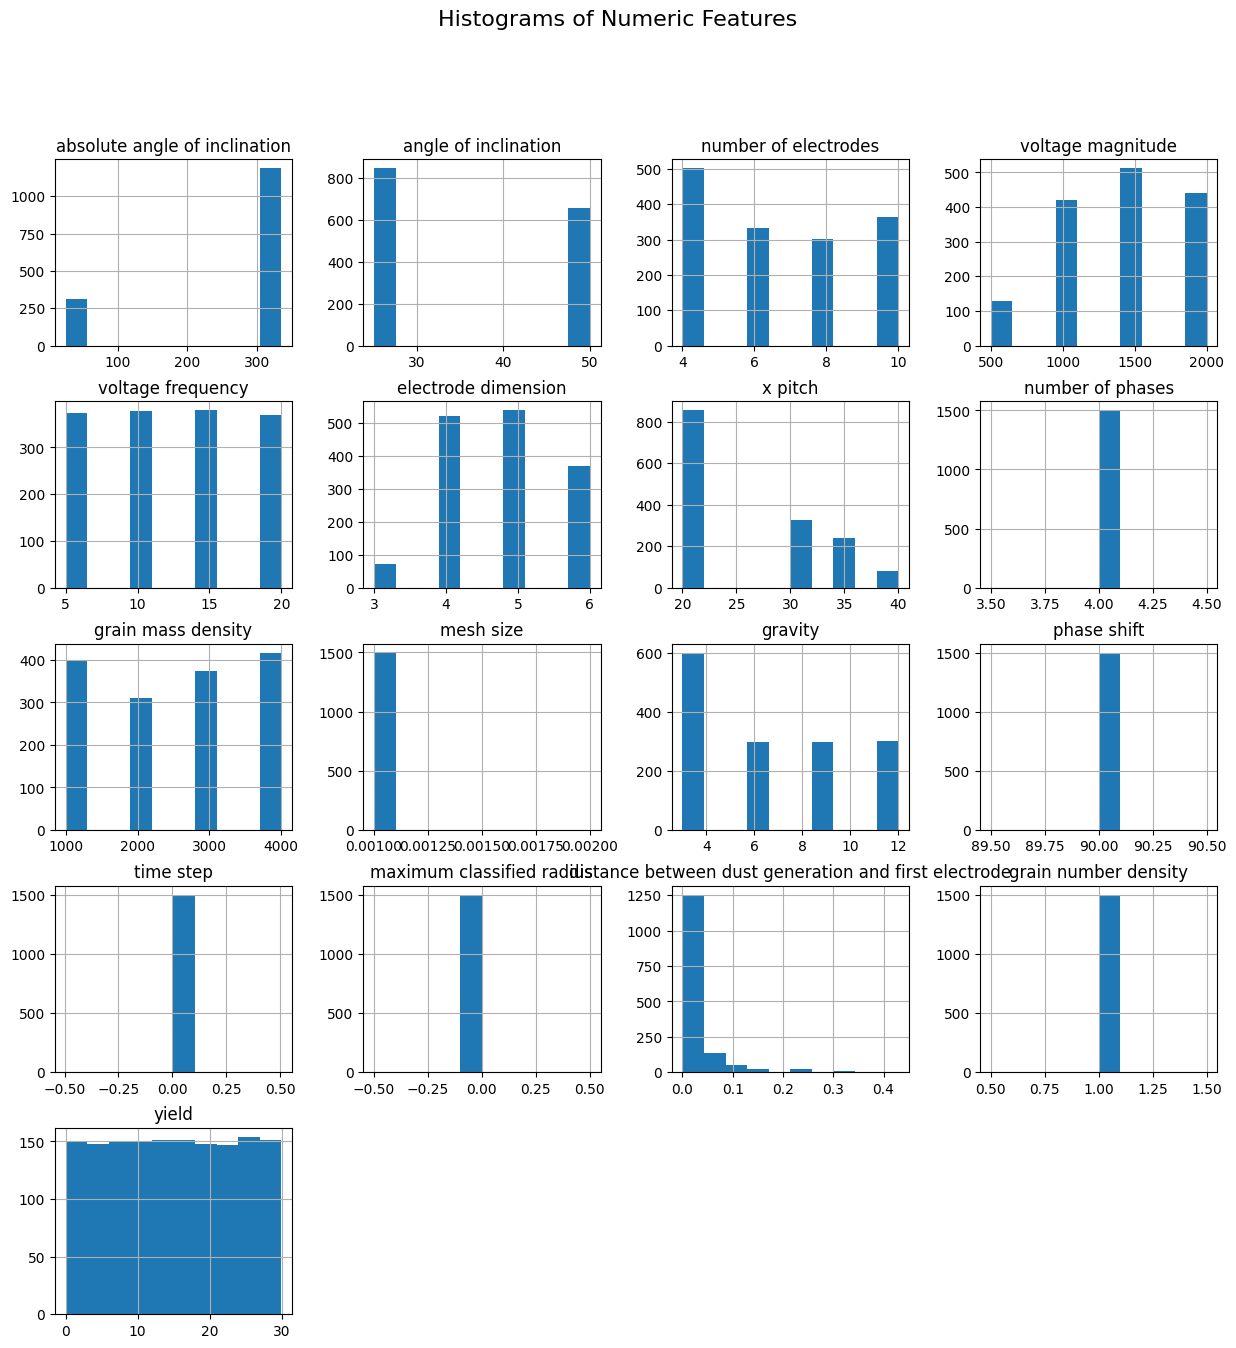

In [94]:
import matplotlib.pyplot as plt

numeric_features = subset_data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [95]:
subset_data.to_csv('subset_data.csv') 

In [16]:
numeric_features = ['absolute angle of inclination', 'voltage magnitude', 'voltage frequency',
                    'electrode dimension', 'x pitch', 'grain mass density',
                    'gravity', 'distance between dust generation and first electrode']
drop_features = ['number of phases', 'mesh size','phase shift', 
                 'time step', 'maximum classified radius', 'grain number density',
                 'angle of inclination'] # Angle removed to avoid multicollinearity
target = "yield"

In [17]:
from sklearn.model_selection import train_test_split
X = subset_data.drop(target, axis=1)  # Features (independent variables)
y = subset_data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder

numeric_transformer = StandardScaler()
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['absolute angle of inclination',
                                  'voltage magnitude', 'voltage frequency',
                                  'electrode dimension', 'x pitch',
                                  'grain mass density', 'gravity',
                                  'distance between dust generation and first '
                                  'electrode']),
                                ('ordinalencoder', OrdinalEncoder(), []),
                                ('drop', 'drop',
                                 ['number of phases', 'mesh size',
                                  'phase shift', 'time step',
                                  'maximum classified radius',
                                  'grain number density',
                                  'angle of inclination'])])

In [19]:
# Define RMSE calculation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [20]:
# Models to be evaluated
models = {
    'dummy': DummyRegressor(strategy='mean'),
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'polynomial2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'polynomial3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'polynomial4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    #'polynomial5': make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
}

param_grid = {
    'ridge': {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
    'lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1]}
}

In [21]:
import numpy as np

results_dict = {}  # dictionary to store all the results

# Fit models and perform hyperparameter tuning where applicable
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    if name in param_grid:
        # Hyperparameter tuning with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)
        grid_search.fit(X_train, y_train)
        cv_results = grid_search.cv_results_
        best_index = grid_search.best_index_
        results_dict[name] = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
        }
    else:
        # Regular cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                                    scoring=make_scorer(rmse, greater_is_better=False),
                                    return_train_score=True,
                                    return_estimator=True)
        results_dict[name] = {
            'fit_time': np.mean(cv_results['fit_time']),
            'score_time': np.mean(cv_results['score_time']),
            'train_score': -np.mean(cv_results['train_score']),  # Convert to positive
            'test_score': -np.mean(cv_results['test_score'])     # Convert to positive
        }

In [22]:
# Display the results
pd.DataFrame(results_dict).T

,fit_time,score_time,train_score,test_score,best_params
dummy,0.00773,0.003583,8.894289,8.915419,NaN
linear_regression,0.011511,0.003713,5.424719,5.463219,NaN
ridge,0.005295,0.00232,5.424737,5.463166,{'ridge__alpha': 1.0}
lasso,0.004202,0.002003,5.424815,5.462694,{'lasso__alpha': 0.01}
polynomial2,0.009031,0.005091,4.351881,4.636253,NaN
polynomial3,0.03008,0.005457,3.243584,5.135321,NaN
polynomial4,0.166447,0.014675,2.134516,155.974317,NaN


In [29]:
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
pipeline = make_pipeline(preprocessor, model)
# Regular cross-validation
model_results_dict = {}
cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                            scoring=make_scorer(rmse, greater_is_better=False),
                            return_train_score=True,
                            return_estimator=True)
model_results_dict['poly2'] = {'fit_time': np.mean(cv_results['fit_time']),
                            'score_time': np.mean(cv_results['score_time']),
                            'train_score': -np.mean(cv_results['train_score']),  # Convert to positive
                            'test_score': -np.mean(cv_results['test_score'])}
pd.DataFrame(model_results_dict).T

,fit_time,score_time,train_score,test_score
poly2,0.008045,0.002951,4.351881,4.636253


In [41]:
numeric_features = ['absolute angle of inclination', 'voltage magnitude', 'voltage frequency',
                    'electrode dimension', 'x pitch', 'grain mass density',
                    'gravity', 'distance between dust generation and first electrode']
drop_features = ['number of phases', 'mesh size','phase shift', 
                 'time step', 'maximum classified radius', 'grain number density',
                 'angle of inclination'] # Angle removed to avoid multicollinearity
target = "yield"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [104]:
data = read_dataset_folder(Folder_name)
data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,335.0,25.0,4.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,3.738749
1,335.0,25.0,6.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,2.602313
2,335.0,25.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,2.719417
3,335.0,25.0,10.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,1.865867
4,335.0,25.0,4.0,500.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,6.512353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,50.0,50.0,4.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.125134,1.0,1.085980
15849,50.0,50.0,6.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.208557,1.0,0.112520
15850,50.0,50.0,8.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.291980,1.0,0.014352
15851,50.0,50.0,10.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.375402,1.0,0.003888


In [105]:
X_predict = data.drop(target, axis=1)
X_predict = X_predict.drop(drop_features, axis=1)

# Scale the data
X_predict_scaled = scaler.transform(X_predict)

# Transform to polynomial features
X_predict_poly = poly.transform(X_predict_scaled)

# Make predictions
predictions = model.predict(X_predict_poly)

# Add predictions to the original dataset
data['predicted_yield'] = predictions

In [108]:
# Filter the data
filtered_data = data[data['predicted_yield'] >= 30]

# Display the filtered data
filtered_data


,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield,predicted_yield
119,335.0,25.0,4.0,2000.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,36.137329,31.482677
120,335.0,25.0,6.0,2000.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,32.413776,30.899876
121,335.0,25.0,8.0,2000.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,27.981340,30.811434
122,335.0,25.0,10.0,2000.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,28.967287,31.217345
123,335.0,25.0,4.0,2000.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,47.546677,32.195102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15333,335.0,25.0,4.0,2000.0,15.0,6.0,20.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.013011,1.0,30.235662,30.762667
15486,335.0,25.0,4.0,2000.0,20.0,6.0,20.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.013011,1.0,30.569191,30.839192
15534,25.0,25.0,4.0,500.0,5.0,3.0,40.0,4.0,1000.0,0.002,3.0,90.0,0.005,0.00001,0.111914,1.0,0.012485,30.911283
15638,25.0,25.0,4.0,1000.0,10.0,3.0,40.0,4.0,1000.0,0.002,3.0,90.0,0.005,0.00001,0.111914,1.0,0.260649,34.480459
